In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.drop(['society','location','availability','total_sqft'],axis=1,inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  12711 non-null  object 
 1   size       12711 non-null  object 
 2   bath       12711 non-null  float64
 3   balcony    12711 non-null  float64
 4   price      12711 non-null  float64
dtypes: float64(3), object(2)
memory usage: 595.8+ KB


In [8]:
df.replace(to_replace=['Built-up  Area','1 Bedroom'],value=0,inplace=True)
df.replace(to_replace=['Carpet  Area','1 BHK'],value=1,inplace=True)
df.replace(to_replace=['Plot  Area','1 RK'],value=2,inplace=True)
df.replace(to_replace=['Super built-up  Area','10 Bedroom'],value=3,inplace=True)
df.replace(to_replace=['1 BHK'],value=4,inplace=True)
df.replace(to_replace=['11 Bedroom'],value=5,inplace=True)
df.replace(to_replace=['11 BHK'],value=6,inplace=True)
df.replace(to_replace=['12 Bedroom'],value=7,inplace=True)
df.replace(to_replace=['13 BHK'],value=8,inplace=True)
df.replace(to_replace=['14 BHK'],value=9,inplace=True)
df.replace(to_replace=['16 BHK'],value=10,inplace=True)
df.replace(to_replace=['18 Bedroom'],value=11,inplace=True)
df.replace(to_replace=['19 BHK'],value=12,inplace=True)
df.replace(to_replace=['2 Bedroom'],value=13,inplace=True)
df.replace(to_replace=['2 BHK'],value=14,inplace=True)
df.replace(to_replace=['27 BHK'],value=15,inplace=True)
df.replace(to_replace=['3 Bedroom'],value=16,inplace=True)
df.replace(to_replace=['3 BHK'],value=17,inplace=True)
df.replace(to_replace=['4 Bedroom'],value=18,inplace=True)
df.replace(to_replace=['4 BHK'],value=19,inplace=True)
df.replace(to_replace=['43 Bedroom'],value=20,inplace=True)
df.replace(to_replace=['5 Bedroom'],value=21,inplace=True)
df.replace(to_replace=['5 BHK'],value=22,inplace=True)
df.replace(to_replace=['6 Bedroom'],value=23,inplace=True)
df.replace(to_replace=['6 BHK'],value=24,inplace=True)
df.replace(to_replace=['7 Bedroom'],value=25,inplace=True)
df.replace(to_replace=['7 BHK'],value=26,inplace=True)
df.replace(to_replace=['8 Bedroom'],value=27,inplace=True)
df.replace(to_replace=['8 BHK'],value=28,inplace=True)
df.replace(to_replace=['9 Bedroom'],value=29,inplace=True)
df.replace(to_replace=['9 BHK'],value=30,inplace=True)

In [9]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

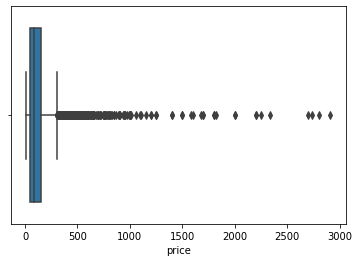

In [10]:
sns.boxplot(df['price'])

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.7625856  0.34626756 0.59162709 0.57381809 0.54851912]
 [0.07261444 0.46190615 1.34647238 1.61005369 0.08773022]
 [1.74301452 0.25986272 0.59162709 1.61005369 0.41796321]
 ...
 [1.74301452 0.25986272 0.05440606 0.57381809 0.03753058]
 [1.74301452 1.06803643 0.70043922 1.66575398 0.54426741]
 [0.7625856  0.66394958 0.70043922 0.57381809 2.0075412 ]]


In [12]:
df = df[(z < 3).all(axis=1)]

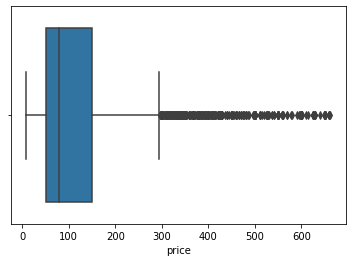

In [13]:
sns.boxplot(df['price'])

In [14]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[7.45477898e-01 3.98166945e-01 6.58716281e-01 5.90243733e-01
  7.42312685e-01]
 [8.51935032e-02 5.00735352e-01 1.71115564e+00 1.61882752e+00
  1.38837930e-03]
 [1.74653630e+00 2.76009777e-01 6.58716281e-01 1.61882752e+00
  5.32385657e-01]
 ...
 [1.74653630e+00 2.76009777e-01 1.31241025e-01 5.90243733e-01
  2.00024381e-01]
 [1.74653630e+00 1.17491207e+00 9.21198330e-01 1.69477936e+00
  1.01483055e+00]
 [7.45477898e-01 7.25460926e-01 9.21198330e-01 5.90243733e-01
  3.36769780e+00]]


In [15]:
df = df[(z < 3).all(axis=1)]

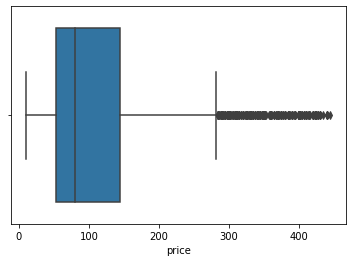

In [16]:
sns.boxplot(df['price'])

In [17]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.74332691 0.98851804 0.75841825 0.63875836 0.85343234]
 [0.0867828  0.6040535  1.93056434 1.59958322 0.08607893]
 [1.74700223 0.20591062 0.75841825 1.59958322 0.58723941]
 ...
 [1.74700223 0.20591062 0.13790928 1.59958322 0.24860404]
 [1.74700223 0.20591062 0.13790928 0.63875836 0.34147554]
 [1.74700223 1.79848216 1.03423681 1.75792915 1.37467092]]


In [18]:
df = df[(z < 3).all(axis=1)]

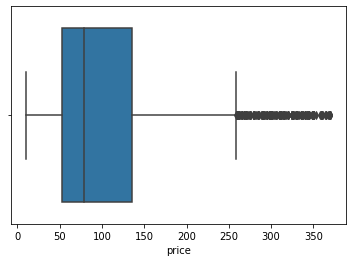

In [19]:
sns.boxplot(df['price'])

In [20]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.73302234 1.02287996 0.73759364 0.62926328 0.88530789]
 [0.09449178 0.73158572 2.06355059 1.61789103 0.19265697]
 [1.74952003 0.2929693  0.73759364 1.61789103 0.57988673]
 ...
 [1.74952003 0.2929693  0.1961211  1.61789103 0.37913303]
 [1.74952003 0.2929693  0.1961211  0.62926328 0.48569078]
 [1.74952003 2.04743498 1.12983585 1.75284044 1.67114577]]


In [21]:
df = df[(z < 3).all(axis=1)]

In [22]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.73130904 1.0180183  0.72511915 0.62582651 0.90738671]
 [0.09536012 0.77425269 2.14183883 1.63119504 0.27378418]
 [1.74869845 0.32618494 0.72511915 1.63119504 0.57272405]
 ...
 [1.74869845 0.32618494 0.23053351 1.63119504 0.47811376]
 [1.74869845 0.32618494 0.23053351 0.62582651 0.59487351]
 [1.74869845 2.11845593 1.18618617 1.75433729 1.8938258 ]]


In [23]:
df = df[(z < 3).all(axis=1)]

In [24]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.71613621 1.03727386 0.71488928 0.6228384  0.90755075]
 [0.10621233 0.97506822 2.58630955 1.65262264 0.37465175]
 [1.75090941 0.4719827  0.71488928 1.65262264 0.54426268]
 ...
 [1.75090941 0.4719827  0.38551033 1.65262264 0.59645868]
 [1.75090941 0.4719827  0.38551033 0.6228384  0.7232055 ]
 [1.75090941 2.48432478 1.48590994 1.76056892 2.13326385]]


In [25]:
df = df[(z < 3).all(axis=1)]

In [26]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.71311625 1.02917425 0.70624217 0.61865978 0.9251656 ]
 [0.10904282 0.99072388 2.6237758  1.66115929 0.44969113]
 [1.75336097 0.48574935 0.70624217 1.66115929 0.53562569]
 ...
 [1.75336097 0.48574935 0.40376382 1.66115929 0.68752623]
 [1.75336097 0.48574935 0.40376382 0.61865978 0.82343199]
 [1.75336097 2.50564748 1.51376981 1.75856931 2.33538367]]


In [27]:
df = df[(z < 3).all(axis=1)]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4772 entries, 0 to 13315
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  4772 non-null   int64  
 1   size       4772 non-null   int64  
 2   bath       4772 non-null   float64
 3   balcony    4772 non-null   float64
 4   price      4772 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 223.7 KB


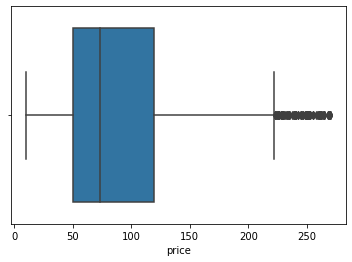

In [29]:
sns.boxplot(df['price'])

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         1480 non-null   float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [31]:
test.drop(['society','availability','location','total_sqft','price'],axis=1,inplace=True)

In [32]:
test.replace(to_replace=['Built-up  Area','1 Bedroom'],value=0,inplace=True)
test.replace(to_replace=['Carpet  Area','1 BHK'],value=1,inplace=True)
test.replace(to_replace=['Plot  Area','1 RK'],value=2,inplace=True)
test.replace(to_replace=['Super built-up  Area','10 Bedroom'],value=3,inplace=True)
test.replace(to_replace=['1 BHK'],value=4,inplace=True)
test.replace(to_replace=['11 Bedroom'],value=5,inplace=True)
test.replace(to_replace=['11 BHK'],value=6,inplace=True)
test.replace(to_replace=['12 Bedroom'],value=7,inplace=True)
test.replace(to_replace=['13 BHK'],value=8,inplace=True)
test.replace(to_replace=['14 BHK'],value=9,inplace=True)
test.replace(to_replace=['16 BHK'],value=10,inplace=True)
test.replace(to_replace=['18 Bedroom'],value=11,inplace=True)
test.replace(to_replace=['19 BHK'],value=12,inplace=True)
test.replace(to_replace=['2 Bedroom'],value=13,inplace=True)
test.replace(to_replace=['2 BHK'],value=14,inplace=True)
test.replace(to_replace=['27 BHK'],value=15,inplace=True)
test.replace(to_replace=['3 Bedroom'],value=16,inplace=True)
test.replace(to_replace=['3 BHK'],value=17,inplace=True)
test.replace(to_replace=['4 Bedroom'],value=18,inplace=True)
test.replace(to_replace=['4 BHK'],value=19,inplace=True)
test.replace(to_replace=['43 Bedroom'],value=20,inplace=True)
test.replace(to_replace=['5 Bedroom'],value=21,inplace=True)
test.replace(to_replace=['5 BHK'],value=22,inplace=True)
test.replace(to_replace=['6 Bedroom'],value=23,inplace=True)
test.replace(to_replace=['6 BHK'],value=24,inplace=True)
test.replace(to_replace=['7 Bedroom'],value=25,inplace=True)
test.replace(to_replace=['7 BHK'],value=26,inplace=True)
test.replace(to_replace=['8 Bedroom'],value=27,inplace=True)
test.replace(to_replace=['8 BHK'],value=28,inplace=True)
test.replace(to_replace=['9 Bedroom'],value=29,inplace=True)
test.replace(to_replace=['9 BHK'],value=30,inplace=True)
test.replace(to_replace=['16 Bedroom'],value=31,inplace=True)

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  1480 non-null   int64  
 1   size       1478 non-null   float64
 2   bath       1473 non-null   float64
 3   balcony    1411 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 46.4 KB


In [34]:
test['size'].mode()

0    14.0
dtype: float64

In [35]:
test['bath'].mode()

0    2.0
dtype: float64

In [36]:
test['balcony'].mode()

0    1.0
dtype: float64

In [37]:
test['size'].replace(np.nan,14,inplace=True)
test['bath'].replace(np.nan,2,inplace=True)
test['balcony'].replace(np.nan,1,inplace=True)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  1480 non-null   int64  
 1   size       1480 non-null   float64
 2   bath       1480 non-null   float64
 3   balcony    1480 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 46.4 KB


In [39]:
X=df.drop(['price'], axis=1).values
y=df['price'].values

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=1)

In [41]:
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
print(f"Multiple Linear Regression coeff: {regressor.coef_}")
print(f"Multiple Linear Regression Constant: {regressor.intercept_}")

Multiple Linear Regression coeff: [-2.68786981  2.59426587 31.94358895 -0.15357534]
Multiple Linear Regression Constant: -28.8040726082576


In [43]:
y_predict=regressor.predict(X_test)

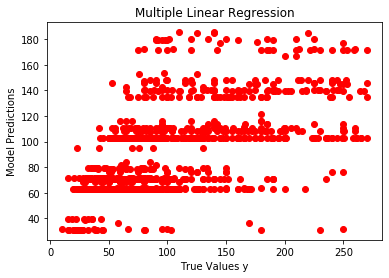

In [44]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [45]:
n=len(X_test)
n

1193

In [46]:
k=X_test.shape[1]
k

4

In [47]:
r2=r2_score(y_test, y_predict)
r2

0.3506644984657963

In [48]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.34847818364581584

In [49]:
# Ridge 
regressor_ridge=Ridge(alpha=1)
regressor_ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [50]:
print(f'Coeff:{regressor_ridge.coef_}')
print(f'Constant:{regressor_ridge.intercept_}')

Coeff:[-2.68802279  2.60127863 31.92149379 -0.15324038]
Constant:-28.85833977591558


In [51]:
y_predict=regressor_ridge.predict(X_test)

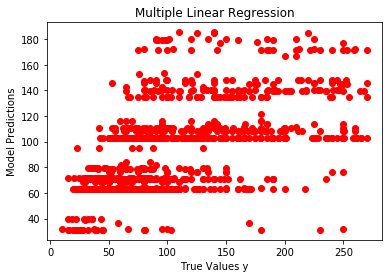

In [52]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [53]:
r2=r2_score(y_test, y_predict)
r2

0.3506591233028109

In [54]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.3484727903846385

In [55]:
# Lasso
regressor_lasso=Lasso(alpha=1)
regressor_lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [56]:
print(f'Coeff:{regressor_lasso.coef_}')
print(f'Constant:{regressor_lasso.intercept_}')

Coeff:[-2.0944535   2.88784925 30.2915655  -0.        ]
Constant:-30.658529736746104


In [57]:
y_predict=regressor_lasso.predict(X_test)

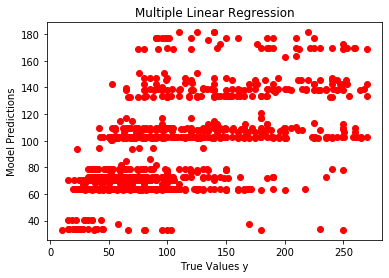

In [58]:
plt.scatter(y_test, y_predict,color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values y')
plt.title('Multiple Linear Regression')
plt.show()

In [59]:
r2=r2_score(y_test, y_predict)
r2

0.34899989773251283

In [60]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.34680797819625864

In [61]:
y_predict=regressor.predict(test)

In [62]:
y_predict.shape

(1480,)

In [63]:
y_predict

array([ 63.0320674 , 328.23904795, 171.92776755, ...,  63.0320674 ,
        71.24925217,  71.09567683])

In [64]:
predict=pd.DataFrame(data=y_predict)

In [65]:
predict.head()

,0
0,63.032067
1,328.239048
2,171.927768
3,102.912029
4,63.185643


In [66]:
#predict.to_csv('solution.csv',index=False)